![image.png](https://raw.githubusercontent.com/fjvarasc/DSPXI/master/figures/python_logo.png)

## Creating the Sign-In Interface

go to /templates and create a new file called signin.html. Open signin.html and add the following HTML code:

```html
<!DOCTYPE html>
<html lang="en">
  <head>
    <title>Python Flask Bucket List App</title>
 
    
    <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" rel="stylesheet">
    <link href="https://getbootstrap.com/docs/3.3/examples/jumbotron-narrow/jumbotron-narrow.css" rel="stylesheet">
 
    <link href="../static/css/signup.css" rel="stylesheet">
    <script src="../static/js/jquery-1.11.2.js"></script>
    
  </head>
 
  <body>
 
    <div class="container">
      <div class="header">
        <nav>
          <ul class="nav nav-pills pull-right">
            <li role="presentation" ><a href="/">Home</a></li>
            <li role="presentation" class="active"><a href="#">Sign In</a></li>
            <li role="presentation" ><a href="/showSignUp">Sign Up</a></li>
          </ul>
        </nav>
        <h3 class="text-muted">Python Flask App</h3>
      </div>
 
      <div class="jumbotron">
        <h1>Bucket List App</h1>
        <form class="form-signin" action="/validateLogin" method="post">
        <label for="inputEmail" class="sr-only">Email address</label>
        <input type="email" name="inputEmail" id="inputEmail" class="form-control" placeholder="Email address" required autofocus>
        <label for="inputPassword" class="sr-only">Password</label>
        <input type="password" name="inputPassword" id="inputPassword" class="form-control" placeholder="Password" required>
         
        <button id="btnSignIn" class="btn btn-lg btn-primary btn-block" type="submit">Sign in</button>
      </form>
      </div>
 
       
 
      <footer class="footer">
        <p>&copy; Company 2015</p>
      </footer>
 
    </div>
  </body>
</html>
```

next, add a new route to our app.

```python
@application.route('/showSignin')
def showSignin():
    return render_template('signin.html')

```

Next, open up index.html and signup.html, and add the href link for sign-in on both the pages as /showSignin. Save all the changes and restart the server. Below is our app.

In [ ]:
from flask import Flask, render_template, request, json
from werkzeug import generate_password_hash, check_password_hash

application = Flask(__name__)

from sqlalchemy import create_engine
db_engine = create_engine("sqlite:///BucketList.db")

@application.route("/")
def main():
    return render_template('index_bucket.html')

@application.route('/signUp',methods=['POST'])
def signUp():

    # read the posted values from the UI
    _name = request.form['inputName']
    _email = request.form['inputEmail']
    _password = request.form['inputPassword']
    _hashed_password = generate_password_hash(_password)

    data = ('null', _name , _email , _hashed_password)
    db_engine.execute('INSERT INTO tbl_user (user_id,user_name,user_username,user_password) VALUES (%s, "%s", "%s", "%s");' % (data))
    
    # validate the received values, if the user was inserted correctly
    #return json.dumps({'message':'User created successfully !'})
    #else
    #return error to console and redirect to home page
    
@application.route('/showSignUp')
def showSignUp():
    return render_template('signup.html')

@application.route('/showSignin')
def showSignin():
    return render_template('signin.html')

if __name__ == "__main__":
    application.run(host='0.0.0.0',port=8080)

Point your browser to http://localhost:8080 and click on the `Sign In` link, and you should be able to see the sign-in page.

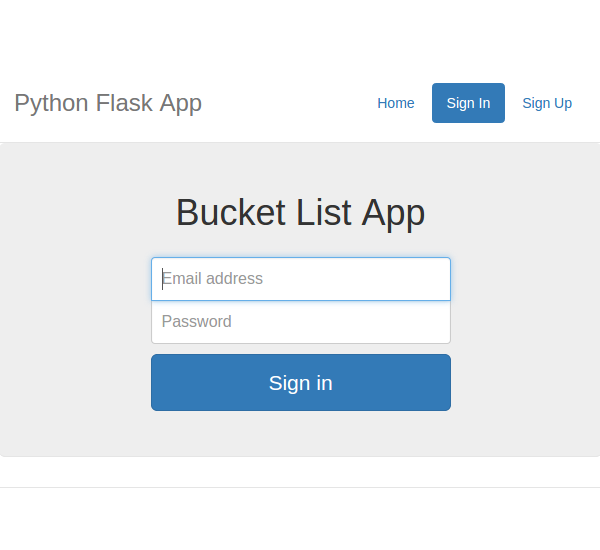

### Implementing Sign-In
Now, we need to create function to validate the user login. On clicking Sign In similiar as we did before we'll post the entered email address and password to the validate user function.

```python
@app.route('/validateLogin',methods=['POST'])
def validateLogin():
    try:
        _username = request.form['inputEmail']
        _password = request.form['inputPassword']
 
    except Exception as e:
        return render_template('error.html',error = str(e))
 ```
 
 As seen in the above code, we have read the posted email address and password into _username and _password. Now we'll check the data from the user with the database. So let use the DB connection from our app `db_engine` variable.

```python
data = db_engine.execute('select * from tbl_user where user_username = "%s"' % _username).fetchall()
```

once we execute the query we validate the password.

```python
if len(data) > 0: #if >0 means that the user was found on the database but we need to validate the password
    if check_password_hash(str(data[0][3]),_password):
        return redirect('/userHome')
    else:
        return render_template('error.html',error = 'Wrong Email address or Password.')
else:
    return render_template('error.html',error = 'Wrong Email address or Password.')
```

As seen in the above code, we have used a method called `check_password_hash` to check if the returned hash password matches the password entered by the user. If all is good then we'll redirect the user to userHome.html. And if there is any error, we'll display error.html with the error message.

Let's warp up everything, our code should look like the one below:

```python
@application.route('/validateLogin',methods=['POST'])
def validateLogin():
    try:
        _username = request.form['inputEmail']
        _password = request.form['inputPassword']
 
        data = db_engine.execute('select * from tbl_user where user_username = "%s"' % _username).fetchall()

        if len(data) > 0:
            if check_password_hash(str(data[0][3]),_password):
                session['user'] = data[0][0]
                return redirect('/userHome')
            else:
                return render_template('error.html',error = 'Wrong Email address or Password.')
        else:
            return render_template('error.html',error = 'Wrong Email address or Password.')
 
 
    except Exception as e:
        return render_template('error.html',error = str(e))
    #finally:
    #    db_engine.close()
```

Create a page called `userHome.html` inside the templates folder and add the following HTML code:

```html

<!DOCTYPE html>
<html lang="en">
  <head>
    <title>Python Flask Bucket List App</title>

    <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" rel="stylesheet">
    <link href="https://getbootstrap.com/docs/3.3/examples/jumbotron-narrow/jumbotron-narrow.css" rel="stylesheet">
 
    <link href="../static/css/signup.css" rel="stylesheet">
    <script src="../static/js/jquery-1.11.2.js"></script>
    
   
  </head>

  <body>

    <div class="container">
      <div class="header">
        <nav>
          <ul class="nav nav-pills pull-right">
            <li role="presentation" class="active"><a href="/logout">Logout</a></li>
          </ul>
        </nav>
        <h3 class="text-muted">Python Flask App</h3>
      </div>

      <div class="jumbotron">
        <h1>Welcome Home !!</h1>
       
      </div>

      

      <footer class="footer">
        <p>Powered by &copy; Teraworks 2019</p>
      </footer>

    </div>
  </body>
</html>
```

Also create an error page called error.html in templates folder and add the following HTML code:

```html
<!DOCTYPE html>
<html lang="en">
  <head>
    <title>Unauthorized Access:: Python Flask Bucket List App</title>

   
    <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" rel="stylesheet">
    <link href="https://getbootstrap.com/docs/3.3/examples/jumbotron-narrow/jumbotron-narrow.css" rel="stylesheet">
 
    <link href="../static/css/signup.css" rel="stylesheet">
    
   
  </head>

  <body>

    <div class="container">
      <div class="header">
        <nav>
           <ul class="nav nav-pills pull-right">
            <li role="presentation" class="active"><a href="#">Home</a></li>
            <li role="presentation"><a href="/showSignin">Sign In</a></li>
 	    <li role="presentation"><a href="/showSignUp">Sign Up</a></li>
          </ul>
        </nav>
        <h3 class="text-muted">Python Flask App</h3>
      </div>

      <div class="jumbotron">
        <h1>{ {error} }</h1>
        
      </div>

      

      <footer class="footer">
        <p>Powered by &copy; Teraworks 2019</p>
      </footer>

    </div>
  </body>
</html>

```

Inside `error.html` we have an element as shown:
```text
<h1>{ {error} }</h1>
```

The value for the variable can be passed from the render_template function and can be set dynamically.

On successful sign-in we are redirecting the user to the user home page, so we need to create a route called /userHome as shown:

```python
@application.route('/userHome')
def userHome():
    return render_template('userHome.html')
```

Save all the changes and run the server. Click on the Sign In link in the home page and try to sign in using a valid email address and password. On successful user validation, you should have a page as shown below

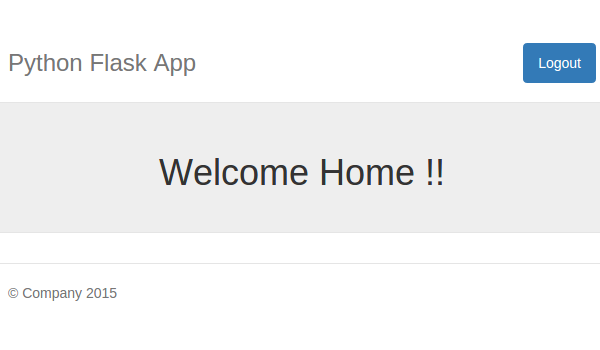

On an unsuccessful user validation the user will be redirected to an error page as shown below:


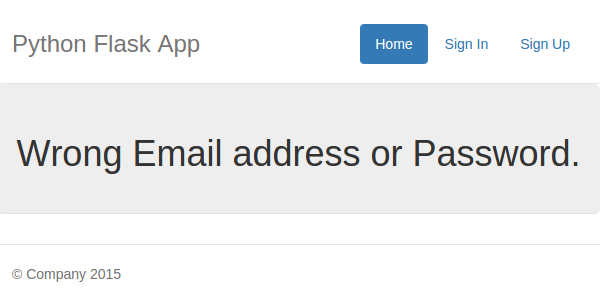

Here we have used a separate error page to display the error. It's also fine if you want to use the same page to display the error message. (discuss with the class how)

for testing purposes here is the complete code including all the changes of the last section. Note that we have also added the session and redirect import on the headers.

In [ ]:
from flask import Flask, render_template, request, json,redirect
from werkzeug import generate_password_hash, check_password_hash
#https://techtutorialsx.com/2016/12/27/9345/
#https://blog.miguelgrinberg.com/post/running-your-flask-application-over-https

#from flask_sslify import SSLify

application = Flask(__name__)

from sqlalchemy import create_engine
db_engine = create_engine("sqlite:///BucketList.db")

@application.route("/")
def main():
    return render_template('index_bucket.html')

@application.route('/signUp',methods=['POST'])
def signUp():

    # read the posted values from the UI
    _name = request.form['inputName']
    _email = request.form['inputEmail']
    _password = request.form['inputPassword']
    _hashed_password = generate_password_hash(_password)

    data = ('null', _name , _email , _hashed_password)
    db_engine.execute('INSERT INTO tbl_user (user_id,user_name,user_username,user_password) VALUES (%s, "%s", "%s", "%s");' % (data))
    
    # validate the received values, if the user was inserted correctly
    #return json.dumps({'message':'User created successfully !'})
    #else
    #return error to console and redirect to home page

@application.route('/showSignUp')
def showSignUp():
    return render_template('signup.html')

@application.route('/showSignin')
def showSignin():
    return render_template('signin.html')

@application.route('/validateLogin',methods=['POST'])
def validateLogin():
    try:
        _username = request.form['inputEmail']
        _password = request.form['inputPassword']
 
        data = db_engine.execute('select * from tbl_user where user_username = "%s"' % _username).fetchall()

        if len(data) > 0:
            if check_password_hash(str(data[0][3]),_password):
                return redirect('/userHome')
            else:
                return render_template('error.html',error = 'Wrong Email address or Password.')
        else:
            return render_template('error.html',error = 'Wrong Email address or Password.')
 
 
    except Exception as e:
        return render_template('error.html',error = str(e))
    #finally:
        
    #    db_engine.close()

@application.route('/userHome')
def userHome():
    return render_template('userHome.html')

if __name__ == "__main__":
    application.run(host='0.0.0.0',port=8080)#,ssl_context='adhoc') #you can run without ssl_context

## Restricting Unauthorized Access to the User Home Page

On successful user validation a user is redirected to the user home page. But right now even an unauthorized user can view the home page by simply browsing the URL http://localhost:8080/userHome. 

To restrict unauthorized user access, we'll check for a session variable which we'll set on successful user login. to do that we import `session` from flask:

```python
import session from flask
```

We also need to set a secret key for the session. So in app.py, after the app as been initialized, set the secret key as shown :

```python
app.secret_key = 'DSPXI2019'
```

Now, inside the validateLogin method, before redirecting the user to /userHome on successful sign-in, set the session variable as shown:

```python
session['user'] = data[0][0]
```

Next, inside the userHome method, check for the session variable before rendering userHome.html. If the session variable is not found, redirect to the error page.

```python
@application.route('/userHome')
def userHome():
    if session.get('user'):
        return render_template('userHome.html')
    else:
        return render_template('error.html',error = 'Unauthorized Access')
```

Save all the changes and start the server. Without signing in, try to navigate to http://localhost:8080/userHome and since you haven't logged in yet, you should be redirected to the error page.

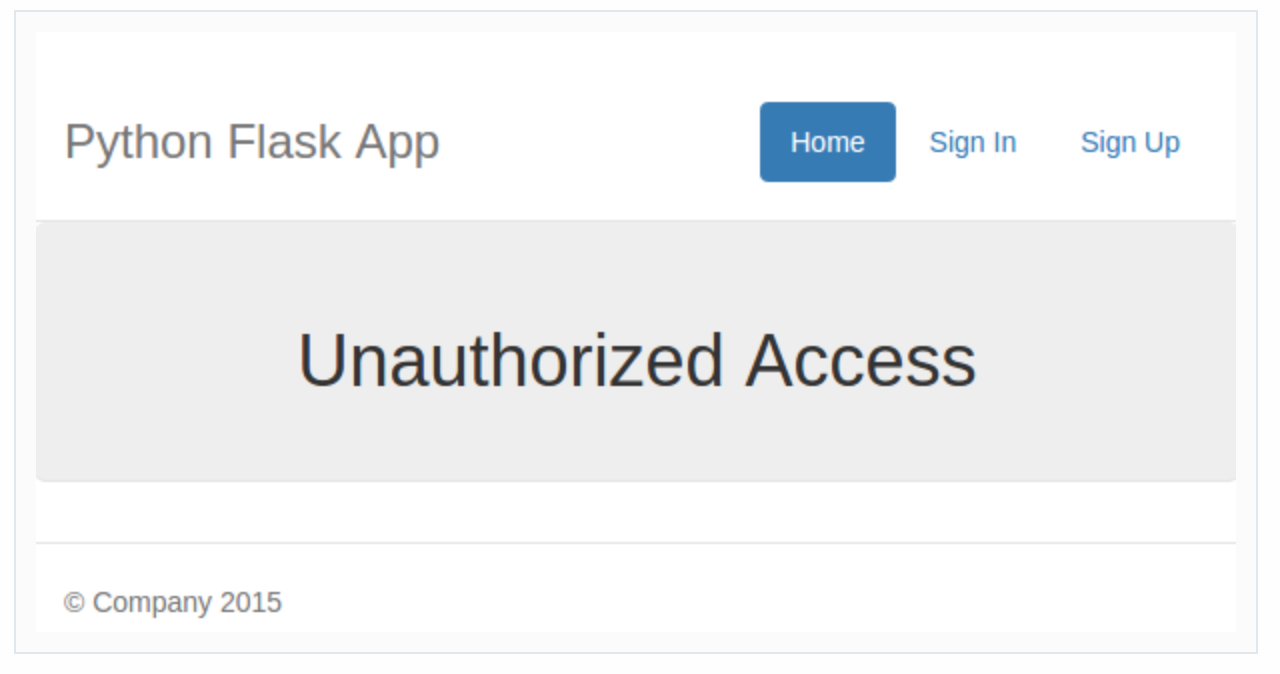

## Implementing Logout

Implementing the logout functionality is the simplest. All we need to do is make the session variable user null and redirect the user to the main page. 

Inside our app, create a new route and method for logout as shown: 

```python
@application.route('/logout')
def logout():
    session.pop('user',None)
    return redirect('/')
```

We have already set the href for the log out button to /logout. So save all the changes and restart the server. From the home page, click on Sign In and try to log in using a valid email address and password. Once signed in, click on the Logout button in user home and you should be successfully logged out from the application.

In [2]:
from flask import Flask, render_template, request, json, redirect, session
from werkzeug import generate_password_hash, check_password_hash

application = Flask(__name__)
application.secret_key = 'DSPXI2019'

from sqlalchemy import create_engine
db_engine = create_engine("sqlite:///BucketList.db")

@application.route("/")
def main():
    return render_template('index_bucket.html')

@application.route('/signUp',methods=['POST'])
def signUp():

    # read the posted values from the UI
    _name = request.form['inputName']
    _email = request.form['inputEmail']
    _password = request.form['inputPassword']
    _hashed_password = generate_password_hash(_password)

    data = ('null', _name , _email , _hashed_password)
    db_engine.execute('INSERT INTO tbl_user (user_id,user_name,user_username,user_password) VALUES (%s, "%s", "%s", "%s");' % (data))
    
    # validate the received values, if the user was inserted correctly
    #return json.dumps({'message':'User created successfully !'})
    #else
    #return error to console and redirect to home page

@application.route('/showSignUp')
def showSignUp():
    return render_template('signup.html')

@application.route('/showSignin')
def showSignin():
    return render_template('signin.html')

@application.route('/validateLogin',methods=['POST'])
def validateLogin():
    try:
        _username = request.form['inputEmail']
        _password = request.form['inputPassword']
 
        data = db_engine.execute('select * from tbl_user where user_username = "%s"' % _username).fetchall()

        if len(data) > 0:
            if check_password_hash(str(data[0][3]),_password):
                session['user'] = data[0][0]
                return redirect('/userHome')
            else:
                return render_template('error.html',error = 'Wrong Email address or Password.')
        else:
            return render_template('error.html',error = 'Wrong Email address or Password.')
 
 
    except Exception as e:
        return render_template('error.html',error = str(e))
    #finally:
        
    #    db_engine.close()

@application.route('/userHome')
def userHome():
    if session.get('user'):
        return render_template('userHome.html')
    else:
        return render_template('error.html',error = 'Unauthorized Access')

@application.route('/logout')
def logout():
    session.pop('user',None)
    return redirect('/')

if __name__ == "__main__":
    application.run(host='0.0.0.0',port=8080)

Writing app.py
